In [1]:
from google.cloud import bigquery

In [2]:
import os
os.environ["GCLOUD_PROJECT"] = "ethtoken88"

In [3]:
client = bigquery.Client(project="ethtoken88")

In [4]:
import numpy as np
import pandas as pd
# https://github.com/SohierDane/BigQuery_Helper
from bq_helper import BigQueryHelper

In [5]:
bq_assistant = BigQueryHelper("bigquery-public-data", "crypto_ethereum")

Please ensure you specify a project id when creating the client in order to use your BigQuery account.


In [6]:
%%time
bq_assistant.list_tables()

CPU times: user 25.2 ms, sys: 9.61 ms, total: 34.9 ms
Wall time: 1.53 s


['amended_tokens',
 'balances',
 'blocks',
 'contracts',
 'load_metadata',
 'logs',
 'sessions',
 'token_transfers',
 'tokens',
 'traces',
 'transactions']

In [7]:
%%time
bq_assistant.table_schema("tokens")

CPU times: user 5.48 ms, sys: 3.8 ms, total: 9.28 ms
Wall time: 304 ms


,name,type,mode,description
0,address,STRING,REQUIRED,The address of the ERC20 token
1,symbol,STRING,NULLABLE,The symbol of the ERC20 token
2,name,STRING,NULLABLE,The name of the ERC20 token
3,decimals,STRING,NULLABLE,The number of decimals the token uses. Use saf...
4,total_supply,STRING,NULLABLE,The total token supply. Use safe_cast for cast...
5,block_timestamp,TIMESTAMP,REQUIRED,Timestamp of the block where this token was cr...
6,block_number,INTEGER,REQUIRED,Block number where this token was created
7,block_hash,STRING,REQUIRED,Hash of the block where this token was created


In [8]:
%%time
bq_assistant.table_schema("contracts")

CPU times: user 4.66 ms, sys: 1.97 ms, total: 6.63 ms
Wall time: 272 ms


,name,type,mode,description
0,address,STRING,REQUIRED,Address of the contract
1,bytecode,STRING,NULLABLE,Bytecode of the contract
2,function_sighashes,STRING,REPEATED,4-byte function signature hashes
3,is_erc20,BOOLEAN,NULLABLE,Whether this contract is an ERC20 contract
4,is_erc721,BOOLEAN,NULLABLE,Whether this contract is an ERC721 contract
5,block_timestamp,TIMESTAMP,REQUIRED,Timestamp of the block where this contract was...
6,block_number,INTEGER,REQUIRED,Block number where this contract was created
7,block_hash,STRING,REQUIRED,Hash of the block where this contract was created


In [9]:
%%time
bq_assistant.head("blocks", num_rows=4)

CPU times: user 12 ms, sys: 848 µs, total: 12.8 ms
Wall time: 2.73 s


,timestamp,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,...,size,extra_data,gas_limit,gas_used,transaction_count,base_fee_per_gas,withdrawals_root,withdrawals,blob_gas_used,excess_blob_gas
0,2018-12-09 22:12:53+00:00,6857160,0x5976b3f27aec028cc74e5bb89d71c6b72b0ea8a2c9ed...,0x03ceaf7f4fe02662380d863b5338235ab144a0d9ba7c...,0x254b82e806a21927,0x39d8a05c0be72ed662377c7930f3b7fb637d045604f9...,0x940a00800010089281680000210000520a0ae00c6005...,0xa2bd7f2415da55aaccdd4c2dea488d19aea4f2abdb8d...,0x7df4bf2f17188e73fc575aa919c1eb8a75e065fbfbc3...,0xedcf4322c376dac11f2a921801b706dd9594e25c7ab1...,...,24718,0x,7996144,7979885,160,None,None,[],None,None
1,2018-12-09 01:06:37+00:00,6851821,0x9814bac139e70fc2ba1b336c7d09a69d9e67b39fbd28...,0x2040bd46c7f89d12a85b6570f121177266edc22bb26a...,0xff5ca6b011f998a6,0x95e91c499b67a7167a85bd402047a176ad41b38c796f...,0x1062304000e81030ab40152202e0264c459100600a18...,0xa2265992277b5fe3661b35e9eb3bbfdb7a14c1f65f52...,0x086eda02d6be88ed51779c040042b2a3c53069290552...,0x3096eb8819a1be70cc4ca9328779e6a2571e6a84560b...,...,24554,0x506172697479,7984452,7955731,133,None,None,[],None,None
2,2018-12-09 07:48:26+00:00,6853511,0xd89c441b064eac0a8b59355b724e128fd1ef72a89d16...,0x574409546f8a439aa05f62e67f2d709887f01ee4435f...,0xfe5e961807586bda,0x687c58d43dd620cb55b4cbad8e7c5806c1557330176c...,0x00001000004000000000000140000020000000100000...,0xd8a3264f2c587149e50229d099d2729cc7b9ad14d497...,0x21dbe065afafa9bd9aeee8037475a43326961d1df0c2...,0x25063ef3a74c7172d26792f3bc8dd8eac93f7557689d...,...,4968,0x62772e636f6d,8003892,1227225,20,None,None,[],None,None
3,2018-12-09 03:22:16+00:00,6852375,0x1fa1ec7e9bffa77a82a4774f18c8ef561472f53eae92...,0x5cca98e465e334c332d003313109f411f335f5ccebed...,0x6c919e1025473dd5,0xb9ad42860f8caf8e5ad19e75caaceed2af285ad0e944...,0x00000000008000000002000040000000000000280000...,0xdecac60619b13cd5ccd4ae220027080ae9ddee6897e2...,0x959d6479880b526cbb5be3c23df9bd70437c01c9c4b9...,0x737741e8a5732406eebd53b7949af362ade82d1be8cf...,...,3780,0x62772e636f6d,8003927,579852,20,None,None,[],None,None


In [10]:
%%time
bq_assistant.head("tokens", num_rows=4)

CPU times: user 6.2 ms, sys: 1.18 ms, total: 7.38 ms
Wall time: 484 ms


,address,symbol,name,decimals,total_supply,block_timestamp,block_number,block_hash
0,0xdbfde58017c787803e27af56c422fef6d2dd3541,None,None,None,None,2019-10-02 10:33:42+00:00,8662327,0x2911dfb899ccc06591687b9369d02dbaa4d92323011d...
1,0x4a0c567eb959b757620c9bbc7f4f774bfe895b45,None,None,None,None,2019-11-17 09:14:45+00:00,8949620,0x72ff7333d18adefea9f6821da3c3716cce21af9c1726...
2,0x3f1c1bfce3dc639a6bdf0e60210a94c1d97da231,None,None,None,None,2019-10-30 08:13:58+00:00,8839196,0x42e437bc9c2b4063d8e83277d08716791594914f7130...
3,0xad1a895e5fb972f07f67526e7247542666a661a2,None,None,None,None,2019-01-26 08:32:05+00:00,7128229,0x85aaf883fb4d32d36c6b6ff9505233b9269cabb868b2...


In [11]:
# Construct a reference to the dataset
dataset_ref = client.dataset("crypto_ethereum", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [12]:
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

amended_tokens
balances
blocks
contracts
load_metadata
logs
sessions
token_transfers
tokens
traces
transactions


In [13]:
QUERY = """
        SELECT COUNT(address) - COUNT(DISTINCT address)
        FROM `bigquery-public-data.crypto_ethereum.tokens`
        """

In [14]:
%%time
bq_assistant.estimate_query_size(QUERY)

CPU times: user 5.32 ms, sys: 52 µs, total: 5.37 ms
Wall time: 430 ms


0.008965086191892624

In [15]:
# Use query_to_pandas_safe to get the results back as a pandas dataframe:
# It will cancel if the query is more than 1GB

In [16]:
%%time
df = bq_assistant.query_to_pandas_safe(QUERY)

CPU times: user 22.3 ms, sys: 1.18 ms, total: 23.5 ms
Wall time: 1.96 s


In [17]:
print('Size of dataframe: {} Bytes'.format(int(df.memory_usage(index=True, deep=True).sum())))

Size of dataframe: 136 Bytes


In [18]:
df.shape

(1, 1)

In [19]:
df

,f0_
0,6


In [20]:
QUERY = """
        SELECT COUNT(DISTINCT address)
        FROM `bigquery-public-data.crypto_ethereum.tokens`
        """

In [21]:
%%time
bq_assistant.estimate_query_size(QUERY)

CPU times: user 6.14 ms, sys: 165 µs, total: 6.3 ms
Wall time: 389 ms


0.008965086191892624

In [22]:
%%time
df = bq_assistant.query_to_pandas_safe(QUERY)

CPU times: user 16.3 ms, sys: 1.32 ms, total: 17.6 ms
Wall time: 1.83 s


In [23]:
df

,f0_
0,218771


In [24]:
QUERY = """
        SELECT COUNT(*)
        FROM `bigquery-public-data.crypto_ethereum.tokens`
        """

In [25]:
%%time
bq_assistant.estimate_query_size(QUERY)

CPU times: user 3.48 ms, sys: 1.21 ms, total: 4.7 ms
Wall time: 393 ms


0.0

In [26]:
%%time
df = bq_assistant.query_to_pandas_safe(QUERY)

CPU times: user 14.4 ms, sys: 2.06 ms, total: 16.5 ms
Wall time: 1.53 s


In [27]:
df

,f0_
0,218777


In [28]:
QUERY = """
        SELECT address
        FROM `bigquery-public-data.crypto_ethereum.tokens` 
        WHERE address IN
          (SELECT address 
          FROM `bigquery-public-data.crypto_ethereum.tokens`
          GROUP BY address HAVING COUNT(*) > 1)"""

In [29]:
%%time
bq_assistant.estimate_query_size(QUERY)

CPU times: user 5.79 ms, sys: 108 µs, total: 5.9 ms
Wall time: 396 ms


0.008965086191892624

In [30]:
%%time
not_unique_addresses = bq_assistant.query_to_pandas_safe(QUERY)

CPU times: user 16.8 ms, sys: 973 µs, total: 17.8 ms
Wall time: 1.81 s


In [31]:
not_unique_addresses

,address
0,0xff0cca1818ddc0d66b53a96a9aa8bda9043e1437
1,0xff0cca1818ddc0d66b53a96a9aa8bda9043e1437
2,0xff0cca1818ddc0d66b53a96a9aa8bda9043e1437
3,0xff0cca1818ddc0d66b53a96a9aa8bda9043e1437
4,0xff0cca1818ddc0d66b53a96a9aa8bda9043e1437
5,0xff0cca1818ddc0d66b53a96a9aa8bda9043e1437
6,0xff0cca1818ddc0d66b53a96a9aa8bda9043e1437


In [32]:
QUERY_ERC_20 = """
        SELECT COUNT(is_erc20)
        FROM `bigquery-public-data.crypto_ethereum.contracts`
        WHERE is_erc20 = TRUE
        """
QUERY_ERC_721 = """
        SELECT COUNT(is_erc721)
        FROM `bigquery-public-data.crypto_ethereum.contracts`
        WHERE is_erc721 = TRUE
        """
QUERY_ALL = """
        SELECT COUNT(*)
        FROM `bigquery-public-data.crypto_ethereum.contracts`
        """

In [33]:
%%time
bq_assistant.estimate_query_size(QUERY_ERC_721)

CPU times: user 6.3 ms, sys: 1.18 ms, total: 7.48 ms
Wall time: 3.31 s


0.06380956806242466

In [34]:
%%time
bq_assistant.estimate_query_size(QUERY_ALL)

CPU times: user 4.7 ms, sys: 2.11 ms, total: 6.81 ms
Wall time: 2.64 s


0.0

In [35]:
%%time
bq_assistant.estimate_query_size(QUERY_ERC_20)

CPU times: user 5.28 ms, sys: 899 µs, total: 6.18 ms
Wall time: 2.43 s


0.06380956806242466

In [36]:
%%time
is_erc_20 = bq_assistant.query_to_pandas_safe(QUERY_ERC_20)

CPU times: user 67.2 ms, sys: 5.43 ms, total: 72.6 ms
Wall time: 13 s


In [37]:
is_erc_20

,f0_
0,212071


In [38]:
%%time
is_erc_721 = bq_assistant.query_to_pandas_safe(QUERY_ERC_721)

CPU times: user 59.7 ms, sys: 10.4 ms, total: 70.1 ms
Wall time: 12 s


In [39]:
is_erc_721

,f0_
0,6727


In [40]:
%%time
all_contracts = bq_assistant.query_to_pandas_safe(QUERY_ALL)

CPU times: user 70.5 ms, sys: 7.34 ms, total: 77.9 ms
Wall time: 12.7 s


In [41]:
all_contracts

,f0_
0,68515044


In [42]:
import matplotlib.pyplot as plt
import pandas as pd

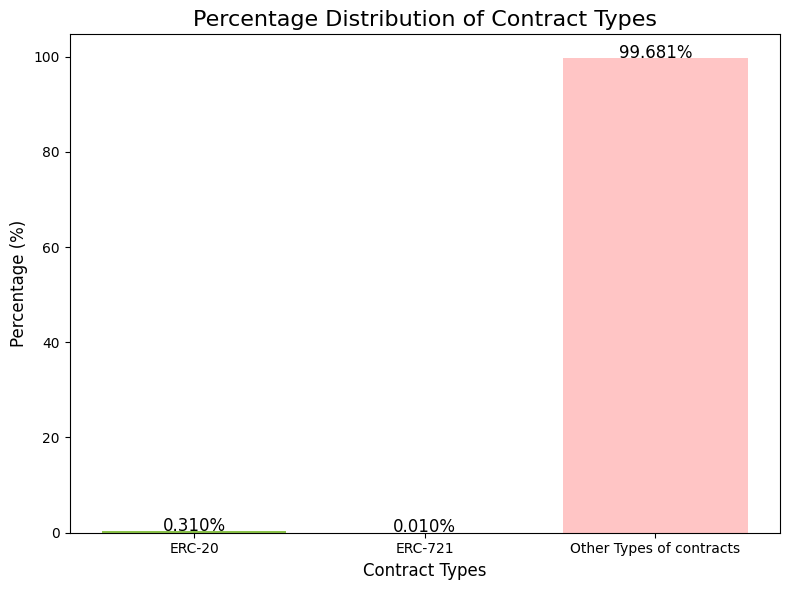

In [43]:



# Extract values from the dataframes
erc_20_count = is_erc_20.iloc[0, 0]
erc_721_count = is_erc_721.iloc[0, 0]
total_contracts = all_contracts.iloc[0, 0]

# Calculate other contracts
other_contracts = total_contracts - (erc_20_count + erc_721_count)

# Calculate percentages
erc_20_percent = (erc_20_count / total_contracts) * 100
erc_721_percent = (erc_721_count / total_contracts) * 100
other_percent = (other_contracts / total_contracts) * 100

# Data for the plot
labels = ['ERC-20', 'ERC-721', 'Other Types of contracts']
percentages = [erc_20_percent, erc_721_percent, other_percent]

# Colors and fonts
colors = ['#8BC34A', '#9B59B6','#FFC5C5']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=colors)

# Add title and labels
plt.title('Percentage Distribution of Contract Types', fontsize=16)
plt.xlabel('Contract Types', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
    
for i, v in enumerate(percentages):
    plt.text(i, v + 0.1, f"{v:.3f}%", ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


